<a href="https://colab.research.google.com/github/Thandesnr/Counry-Snapshot/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature description

**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (£).

**CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.


In [ ]:
!pip install dash
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import dash
import plotly.express as px
import plotly.graph_objects as go
from dash import dcc, html
from dash.dependencies import Input, Output

import re
import string
import spacy
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

from scipy.stats import uniform, randint

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline



from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import  accuracy_score
from sklearn.metrics import mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 20.6 MB/s eta 0:00:00


# Descriptive statistics:

In [ ]:

df = pd.read_excel("/content/online_retailstore.xlsx")


BadZipFile: File is not a zip file

In [ ]:
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


Unique values and Duplicates

In [ ]:
df = df[df["Country"] != "Unspecified"]
print(f"Number of unique values:\n {df.nunique()}")

# Drop all duplicate rows
df_no_duplicates = df.drop_duplicates()


Number of unique values:
 Invoice        28801
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25283
Price           1605
Customer ID     4378
Country           39
dtype: int64


Missing values

In [ ]:
# checking for missing values and their percentages

# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index

# Print
print(f"Columns with missing values:\n{missing_percentage[columns_with_missing]}")



Columns with missing values:
Description     0.557554
Customer ID    20.545900
dtype: float64


In [ ]:
# dropping rows with less that 20% missing values
df.dropna(subset=["Description"], inplace=True)

# dropping the column missing Customer
df.drop("Customer ID", axis = 1, inplace = True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [ ]:
#Adding new columns(Total_price, day, year, month )

df["Revenue"] = df.apply(lambda x: x["Price"] * x["Quantity"], axis=1)

df.drop("Price", axis = 1, inplace = True) # Price column not necessary
df.drop("StockCode", axis = 1, inplace = True) # Price column not necessary


df.head()

,Invoice,Description,Quantity,InvoiceDate,Country,Revenue
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,United Kingdom,83.4
1,489434,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,United Kingdom,81.0
2,489434,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,United Kingdom,81.0
3,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,United Kingdom,100.8
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,United Kingdom,30.0


In [ ]:
# Initialize the Dash app to visualise the  numerical data distribution
app = dash.Dash(__name__)

#select = ["Invoice","Quantity","InvoiceDate","Price","Customer ID","Country","StockCode","Description"]

# Layout o
app.layout = html.Div([
    # Dropdown to select feature
    html.Label('Select Feature:'),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in df],
        value=df.columns[0],
        multi=False,
        placeholder="Select a feature"
    ),

    # Distribution plot
    dcc.Graph(id='distribution-plot'),

    # violin plot
    dcc.Graph(id='violin-plot')
])

# Callback to update distribution plot based on dropdown selection
@app.callback(
    Output('distribution-plot', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_distribution_plot(selected_feature):
    fig = px.histogram(df, x=selected_feature, nbins=20, title=f'Distribution of {selected_feature}')
    return fig

# Callback to update box plot based on dropdown selection
@app.callback(
    Output('violin-plot', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_box_plot(selected_feature):
    fig = px.violin(df, y=selected_feature, box=True, points="all")
    #fig = px.box(select, y=selected_feature, title=f'Box Plot of {selected_feature}')
    return fig

# Run the app
if __name__ == '__main__':
    #app.run_server(debug=True)
    app.run_server(port=8062, debug=True)

<IPython.core.display.Javascript object>



```
# This is formatted as code
```

# Data pre-processing

In [ ]:
# type conversion for StockCode  country

df_encode = df.copy(deep=True)


# lable encoding country column
le = LabelEncoder()
df_encode['Country'] = le.fit_transform(df['Country'])





In [ ]:
df_encode.head()
#df_encode.info()

,Invoice,Description,Quantity,InvoiceDate,Country,Revenue
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,37,83.4
1,489434,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,37,81.0
2,489434,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,37,81.0
3,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,37,100.8
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,37,30.0


In [ ]:
#df_encode.drop(['Description','Country','StockCode'], axis = 1, inplace = True)
#df_encode.set_index("InvoiceDate", inplace=True)

# created a new binary column (0 for not cancelled, 1 for cancelled
#df_encode['IsCancelled'] = np.where(df['Invoice'].astype(str).str.lower().str.startswith('c'), 0, 1)


df_encode.drop('Invoice', axis=1, inplace=True)# Not neccessary anymore
df_encode.drop('InvoiceDate', axis=1, inplace=True)# Not neccessary anymore





df_encode

,Description,Quantity,Country,Revenue
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,37,83.40
1,PINK CHERRY LIGHTS,12,37,81.00
2,WHITE CHERRY LIGHTS,12,37,81.00
3,"RECORD FRAME 7"" SINGLE SIZE",48,37,100.80
4,STRAWBERRY CERAMIC TRINKET BOX,24,37,30.00
...,...,...,...,...
525456,FELTCRAFT DOLL ROSIE,2,37,5.90
525457,FELTCRAFT PRINCESS LOLA DOLL,1,37,3.75
525458,FELTCRAFT PRINCESS OLIVIA DOLL,1,37,3.75
525459,PINK FLORAL FELTCRAFT SHOULDER BAG,2,37,7.50


Text Data preprocessing

In [ ]:
# Dictionary of English Contractions
df_encode["Description"] = df_encode["Description"].astype(str)


contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will","It’s":"it is",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have","that’s":"that is",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the Description column
df_encode["Description_"]=df_encode["Description"].apply(lambda x:expand_contractions(x))
df_encode.drop("Description", axis=1, inplace=True)
df_encode.head(1)


,Quantity,Country,Revenue,Description_
0,12,37,83.4,15CM CHRISTMAS GLASS BALL 20 LIGHTS


In [ ]:
#df_encode.drop("Description_",axis = 1, inplace = True)
df_encode.head()

,Quantity,Country,Revenue,Description_
0,12,37,83.4,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,12,37,81.0,PINK CHERRY LIGHTS
2,12,37,81.0,WHITE CHERRY LIGHTS
3,48,37,100.8,"RECORD FRAME 7"" SINGLE SIZE"
4,24,37,30.0,STRAWBERRY CERAMIC TRINKET BOX


Creating a data term matrix and concatinating it to the dataframe

In [ ]:
# Text embedding using Word2Vec

nltk.download('punkt') #Punkt tokenizer model
# Tokenize and train Word2Vec model
tokenized_descriptions = [word_tokenize(description.lower()) for description in df_encode['Description_']]
embedding_model = Word2Vec(sentences=tokenized_descriptions, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the embedding vector for a description
def get_embedding(description):
    vectors = [embedding_model.wv[word] for word in word_tokenize(description.lower()) if word in embedding_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(embedding_model.vector_size)

# Apply the embedding function to the 'Description_' column
df_encode['Description_Embedding'] = df_encode['Description_'].apply(get_embedding)

# Extract the embedding vectors and create a matrix
embedding_matrix = np.vstack(df_encode['Description_Embedding'].to_numpy())

# Add the embedding matrix back to the dataframe
embedding_columns = [f'embedding_{i}' for i in range(embedding_matrix.shape[1])]
df_encode[embedding_columns] = pd.DataFrame(embedding_matrix, index=df.index)

# Display the resulting dataframe
df_encode.head(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-15-33b739a8cb02>:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-15-33b739a8cb02>:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-15-33b739a8cb02>:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

,Quantity,Country,Revenue,Description_,Description_Embedding,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,12,37,83.4,15CM CHRISTMAS GLASS BALL 20 LIGHTS,"[-0.7753999, 0.5492051, 0.73095244, 0.4817421,...",-0.775400,0.549205,0.730952,0.481742,0.604993,...,-0.772518,1.228740,0.235999,-0.193504,0.930957,0.344499,-0.414031,0.186430,-1.212121,0.303945
1,12,37,81.0,PINK CHERRY LIGHTS,"[-1.1139413, 0.18646896, 0.07279309, -0.196491...",-1.113941,0.186469,0.072793,-0.196492,0.043474,...,-0.803837,0.257512,0.177611,-0.812609,1.637439,0.615539,-0.213962,0.127361,-1.360657,0.335842
2,12,37,81.0,WHITE CHERRY LIGHTS,"[0.00449872, -0.05946672, 0.78318924, -0.90674...",0.004499,-0.059467,0.783189,-0.906748,0.269337,...,-0.876713,0.610205,0.392258,-0.641894,1.178253,0.389464,-0.019841,-0.124819,-0.885314,0.568742
3,48,37,100.8,"RECORD FRAME 7"" SINGLE SIZE","[0.60649747, 0.46075606, -0.27551827, 0.885872...",0.606497,0.460756,-0.275518,0.885873,0.366964,...,0.712058,0.677733,-0.570640,0.444022,1.595434,0.372724,0.350934,0.336633,-0.861635,1.305867
4,24,37,30.0,STRAWBERRY CERAMIC TRINKET BOX,"[-0.9096989, 0.25388065, 0.06065321, 0.0659939...",-0.909699,0.253881,0.060653,0.065994,0.736498,...,0.098264,-0.492273,0.173480,0.390812,-0.575795,1.400848,0.366311,-1.507081,0.703243,-0.073282
5,24,37,39.6,PINK DOUGHNUT TRINKET POT,"[-0.8628211, 0.69142056, -0.16169792, 0.002512...",-0.862821,0.691421,-0.161698,0.002513,-0.001644,...,-0.857693,-0.186899,-0.178894,-0.375835,0.838218,1.840392,-0.350453,-2.727921,0.050939,0.282931
6,24,37,30.0,SAVE THE PLANET MUG,"[0.22265008, -0.38544893, -0.21066445, -0.1793...",0.222650,-0.385449,-0.210664,-0.179368,-0.105722,...,-0.366064,0.591382,-0.247354,-0.722304,-0.691470,0.124748,0.555553,0.447213,0.769344,0.177351
7,10,37,59.5,FANCY FONT HOME SWEET HOME DOORMAT,"[-1.2569627, 0.0320382, -0.35905465, 1.5411754...",-1.256963,0.032038,-0.359055,1.541175,-0.628463,...,0.163782,1.626551,0.384109,-0.245918,0.579383,1.787493,-0.815349,0.185128,-0.612238,-0.045608
8,12,37,30.6,CAT BOWL,"[-0.7254964, -1.0958492, 0.13470864, -0.283154...",-0.725496,-1.095849,0.134709,-0.283155,-0.201274,...,-1.462294,0.965905,-1.458439,-0.452356,0.617581,2.719074,0.513811,0.561492,-0.894834,0.993749
9,12,37,45.0,"DOG BOWL , CHASING BALL DESIGN","[-0.8054759, 0.009978831, 0.015880546, 0.08524...",-0.805476,0.009979,0.015881,0.085243,-0.541939,...,-1.580915,1.904717,-0.019297,0.437225,0.144777,-0.113604,0.406728,-0.649993,-1.307193,-0.093663


In [ ]:
df_encode.drop(["Description_","Description_Embedding"], axis=1, inplace=True)# Not neccessary anymore

df_encode.head(1)

,Quantity,Country,Revenue,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,12,37,83.4,-0.7754,0.549205,0.730952,0.481742,0.604993,0.732894,0.630885,...,-0.772518,1.22874,0.235999,-0.193504,0.930957,0.344499,-0.414031,0.18643,-1.212121,0.303945


Standardization and PCA

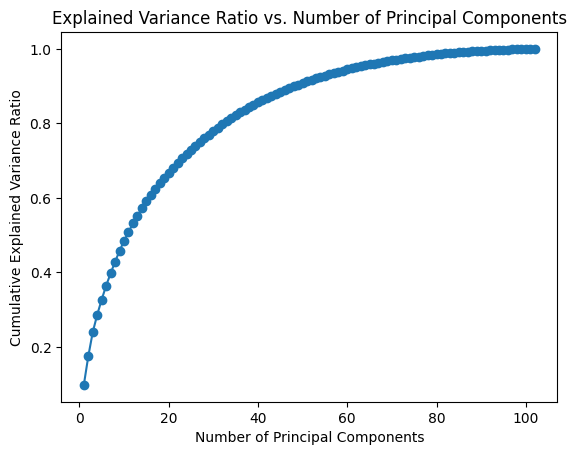

In [ ]:
# making a copy of the df
df_std = df_encode.copy(deep=True)

# Excluding the target variable(Quantity)
independent_features = df_std.iloc[:, 1:]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
independent_std = scaler.fit_transform(independent_features)

# Initialize PCA
pca = PCA()

# Fit PCA on standardized numerical features
pca_result = pca.fit_transform(independent_std)

# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Plot Explained Variance Ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [ ]:

n_components = 60 # desired number of principal components

# PCA again with the cdesired number of principal components
pca = PCA(n_components=n_components)
pca_result2 = pca.fit_transform(independent_std)

# DataFrame with 60 principal components
df_pca = pd.DataFrame(data=pca_result2, columns=[f'PC{i+1}' for i in range(n_components)])

# Combining the dfs
df_combined = pd.concat([df_std.iloc[:, :1], df_pca], axis=1)



# Visualize the DataFrame with a violin plot
#plt.figure(figsize=(10, 6))
#sns.violinplot(data=df_combined, inner="quartile")
#plt.title(f'Violin Plot of Features with {n_components} PCA Components')
#plt.show()

In [ ]:
# checking for nun and duplicates
print(f"shape before : {df_combined.shape}")
print()

print(f" nan count: {df_combined.isnull().sum()}")
print(f"duplicates count: {df_combined.duplicated().sum()}")
print(f"shape before : {df_combined.shape}")
print()

df_combined = df_combined.drop_duplicates()
df_combined = df_combined.dropna()
print(f"shape after droping duplicates and nan values : {df_combined.shape}")



shape before : (525415, 61)

 nan count: Quantity    3192
PC1         3192
PC2         3192
PC3         3192
PC4         3192
            ... 
PC56        3192
PC57        3192
PC58        3192
PC59        3192
PC60        3192
Length: 61, dtype: int64
duplicates count: 274792
shape before : (525415, 61)

shape after droping duplicates and nan values : (247776, 61)


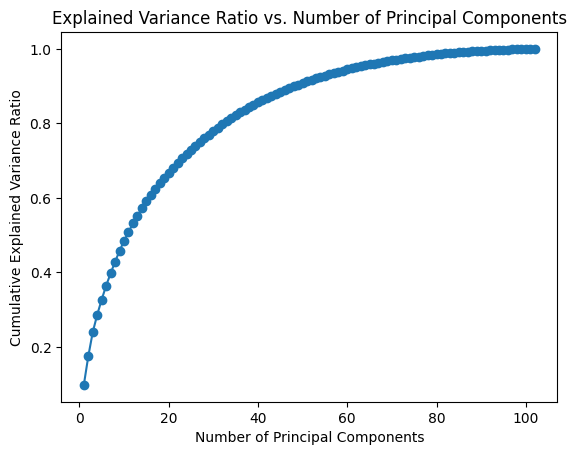

In [ ]:
# making a copy of the df
df_std2 = df_combined.copy(deep=True)

# Excluding the target variable(Quantity)
independent_features = df_std.iloc[:, 1:]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
independent_std = scaler.fit_transform(independent_features)

# Initialize PCA
pca = PCA()

# Fit PCA on standardized numerical features
pca_result = pca.fit_transform(independent_std)

# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Plot Explained Variance Ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [ ]:

n_components = 40 # desired number of principal components

# PCA again with the cdesired number of principal components
pca = PCA(n_components=n_components)
pca_result2 = pca.fit_transform(independent_std)

# DataFrame with 60 principal components
df_pca = pd.DataFrame(data=pca_result2, columns=[f'PC{i+1}' for i in range(n_components)])

# Combining the dfs
df_combined = pd.concat([df_std2.iloc[:, :1], df_pca], axis=1)



# Visualize the DataFrame with a violin plot
#plt.figure(figsize=(10, 6))
#sns.violinplot(data=df_combined, inner="quartile")
#plt.title(f'Violin Plot of Features with {n_components} PCA Components')
#plt.show()

In [ ]:
# checking for nun and duplicates
print(f"shape before : {df_combined.shape}")
print()

print(f" nan count: {df_combined.isnull().sum()}")
print(f"duplicates count: {df_combined.duplicated().sum()}")
print(f"shape before : {df_combined.shape}")
print()

df_combined = df_combined.drop_duplicates()
df_combined = df_combined.dropna()
print(f"shape after droping duplicates and nan values : {df_combined.shape}")



shape before : (522223, 41)

 nan count: Quantity    274447
PC1              0
PC2              0
PC3              0
PC4              0
PC5              0
PC6              0
PC7              0
PC8              0
PC9              0
PC10             0
PC11             0
PC12             0
PC13             0
PC14             0
PC15             0
PC16             0
PC17             0
PC18             0
PC19             0
PC20             0
PC21             0
PC22             0
PC23             0
PC24             0
PC25             0
PC26             0
PC27             0
PC28             0
PC29             0
PC30             0
PC31             0
PC32             0
PC33             0
PC34             0
PC35             0
PC36             0
PC37             0
PC38             0
PC39             0
PC40             0
dtype: int64
duplicates count: 248734
shape before : (522223, 41)

shape after droping duplicates and nan values : (247770, 41)


Correration

In [ ]:

Corr = df_combined.corr()

Corr

,Quantity,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
Quantity,1.000000,-0.001008,-0.002086,-0.000943,-0.003313,0.002802,-0.006601,0.004361,0.003419,-0.001263,...,-0.009195,-0.001337,-0.003662,0.003249,-0.000107,-0.001973,-0.001073,-0.000395,0.001326,0.004329
PC1,-0.001008,1.000000,-0.014828,-0.024487,0.018632,-0.012834,0.019327,-0.024440,0.011776,0.003767,...,0.000110,-0.028396,-0.012650,-0.021312,0.011972,0.007918,-0.018610,-0.014546,0.010821,-0.003457
PC2,-0.002086,-0.014828,1.000000,0.023332,0.018138,0.041514,0.029518,-0.049305,-0.009719,-0.036057,...,-0.002100,0.000219,-0.009278,0.014578,0.010022,-0.007988,-0.018667,-0.005787,0.004930,-0.020199
PC3,-0.000943,-0.024487,0.023332,1.000000,0.025256,0.000854,0.039270,0.011289,0.001252,0.000569,...,0.007661,-0.007219,0.012071,0.010983,-0.002804,-0.001175,0.005496,0.009805,0.003373,0.001636
PC4,-0.003313,0.018632,0.018138,0.025256,1.000000,0.020698,0.020790,-0.011481,0.023760,0.010299,...,0.003994,0.009406,0.002987,-0.007991,-0.003143,0.007121,0.002531,-0.010653,-0.008829,0.007105
PC5,0.002802,-0.012834,0.041514,0.000854,0.020698,1.000000,-0.021708,0.011972,0.005128,0.013414,...,-0.002316,0.003814,0.014731,0.018952,-0.009565,-0.011954,0.000436,-0.005091,0.022954,0.000651
PC6,-0.006601,0.019327,0.029518,0.039270,0.020790,-0.021708,1.000000,-0.004518,-0.002428,0.013517,...,-0.007631,0.012666,0.000011,-0.012996,0.018816,0.024305,0.006164,-0.003329,-0.015692,-0.012481
PC7,0.004361,-0.024440,-0.049305,0.011289,-0.011481,0.011972,-0.004518,1.000000,0.003229,0.018617,...,0.004451,0.003466,-0.025326,-0.002568,-0.001649,-0.010000,0.021977,0.010852,-0.011073,0.019270
PC8,0.003419,0.011776,-0.009719,0.001252,0.023760,0.005128,-0.002428,0.003229,1.000000,-0.013316,...,-0.007252,0.016524,-0.014955,0.000004,0.011896,-0.002960,0.007110,0.010562,-0.001589,-0.005213
PC9,-0.001263,0.003767,-0.036057,0.000569,0.010299,0.013414,0.013517,0.018617,-0.013316,1.000000,...,-0.019541,0.007794,0.036334,-0.009225,-0.001042,0.001418,-0.007883,-0.013386,0.011275,-0.004280


In [ ]:
df_combined.head()

,Quantity,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,12.0,0.646745,3.944987,-0.316661,1.435677,0.887867,-1.042207,-3.648066,2.742059,-1.482559,...,0.749087,-1.256867,-0.438695,0.751303,-0.649204,1.220449,-1.132308,0.456739,-0.073589,-0.556906
1,12.0,-0.599069,1.182566,-0.330413,2.240006,-1.949856,0.868470,-2.163074,0.160597,0.741220,...,-0.839173,0.200657,1.028790,0.139344,2.488821,-0.889661,0.470389,1.553398,-0.469067,-1.920056
2,12.0,0.468437,0.485551,-0.850808,2.711058,-1.200360,0.631734,-3.286278,0.237274,1.064204,...,0.489634,0.971199,-0.363684,0.772829,1.287362,-1.202604,-1.177941,-0.175648,-0.691453,0.985600
3,48.0,2.161038,-0.135774,3.657572,0.914738,-0.424655,1.936238,-4.136177,-1.249777,0.881526,...,-2.553906,1.584424,1.298437,-2.033512,-0.133065,1.235796,-2.118161,0.871485,0.497709,0.554055
4,24.0,-0.326220,-0.348429,-3.591729,-2.720921,-2.352394,2.061655,2.619007,0.830161,1.158089,...,0.343145,-0.531059,0.116269,1.030993,-0.473867,0.822295,0.457228,-0.201546,0.173510,-1.232225


# Machine Learning


In [ ]:
# Features, target variables and splitting the training and test data
#make a function for this later

# Features and target variables
features = df_combined.columns[1:].tolist()

target = "Quantity"

# Split the data
X_train, X_test, y_train, y_test, = train_test_split(
    df_combined[features], df_combined[target], test_size=0.2, random_state=42
)
X_train, X_test, y_train, y_test

(             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 53791   3.269772 -1.095384  5.915038  0.482124  0.705035 -1.474809  1.130659   
 59405  -2.613770  1.375826 -1.105114 -4.539164 -3.784686 -3.152801  0.782258   
 95166   3.188463  0.592322 -1.567788  2.553703  0.388380  1.296539  0.292997   
 163139  1.488415 -0.499600 -1.321991 -1.765625 -0.340443 -0.474485 -1.499138   
 314732 -0.906836 -1.264659 -0.394209 -2.357457  0.639891  3.227871  1.380977   
 ...          ...       ...       ...       ...       ...       ...       ...   
 202572  0.993003  4.832094 -2.193972 -0.879168  1.377301 -0.191769  2.454630   
 168102 -2.012412  3.033504 -1.619243  0.731604 -2.017098  1.537353  2.368825   
 231822  3.427591 -0.193105 -2.551523  0.831787  1.035112 -0.513913 -1.924180   
 268127 -1.974132 -2.506739 -1.164938 -1.041599  0.594616 -4.953549  0.875509   
 207205 -4.549048 -4.192354 -1.537838 -1.512073  1.268814  1.378472 -2.582273   
 
              PC8       PC

In [ ]:
"""
# Support Vector Machine (SVR) with RBF kernel
svr_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]

}

svr = SVR(kernel='rbf')
grid_svr = GridSearchCV(svr, svr_param_grid, scoring='r2', cv=5)
grid_svr.fit(X_train, y_train)

best_svr = grid_svr.best_estimator_

# XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [10, 20],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBRegressor()
grid_xgb = GridSearchCV(xgb_model, xgb_param_grid, scoring='r2', cv=5)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_

# Gradient Boosting Regressor
gb_param_grid = {
    'n_estimators': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingRegressor()
grid_gb = GridSearchCV(gb_model, gb_param_grid, scoring='r2', cv=5)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_

# Evaluate the models
y_pred_svr = best_svr.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

print(f"SVR: {best_svr.score(X_test, y_test)}")
print(f"XGBRegressor: {best_xgb.score(X_test, y_test)}")
print(f"GradientBoostingRegressor: {best_gb.score(X_test, y_test)}")

# Plot feature importance for XGBoost
xgb.plot_importance(best_xgb, importance_type='weight')
plt.show()
"""

'\n# Support Vector Machine (SVR) with RBF kernel\nsvr_param_grid = {\n    \'C\': [0.1, 1, 10],\n    \'gamma\': [0.01, 0.1, 1]\n   \n}\n\nsvr = SVR(kernel=\'rbf\')\ngrid_svr = GridSearchCV(svr, svr_param_grid, scoring=\'r2\', cv=5)\ngrid_svr.fit(X_train, y_train)\n\nbest_svr = grid_svr.best_estimator_\n\n# XGBoost\nxgb_param_grid = {\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [10, 20],\n    \'max_depth\': [3, 4, 5],\n    \'colsample_bytree\': [0.8, 1.0]\n}\n\nxgb_model = xgb.XGBRegressor()\ngrid_xgb = GridSearchCV(xgb_model, xgb_param_grid, scoring=\'r2\', cv=5)\ngrid_xgb.fit(X_train, y_train)\n\nbest_xgb = grid_xgb.best_estimator_\n\n# Gradient Boosting Regressor\ngb_param_grid = {\n    \'n_estimators\': [5, 10, 20],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [3, 4, 5]\n}\n\ngb_model = GradientBoostingRegressor()\ngrid_gb = GridSearchCV(gb_model, gb_param_grid, scoring=\'r2\', cv=5)\ngrid_gb.fit(X_train, y_train)\n\nbest_gb = grid_gb.best_estim

In [ ]:
# support vector model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"SVR: {model.score(X_test,y_test)}")

In [ ]:
#  Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"RF: {model.score(X_test,y_test)}")

In [ ]:
# XGBoost Regression model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"XGBoost: {model.score(X_test,y_test)}")

In [ ]:
print(f"SVR: {model.score(X_test,y_test)}")
print(f"RF: {model.score(X_test,y_test)}")
print(f"XGBoost: {model.score(X_test,y_test)}")

In [ ]:
"""# Random Forest Regression with RandomizedSearchCV
rf_regressor = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [5, 10, 20], 'max_depth': [None], 'min_samples_split': [2, 5, 10]}
rf_random = RandomizedSearchCV(rf_regressor, rf_params, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
rf_best = rf_random.best_estimator_

In [ ]:
"""# XGBoost Regression with RandomizedSearchCV
xgb_regressor = XGBRegressor(random_state=42)
xgb_params = {'n_estimators': [5, 10], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_random = RandomizedSearchCV(xgb_regressor, xgb_params, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
xgb_random.fit(X_train, y_train)
xgb_best = xgb_random.best_estimator_

In [ ]:
"""xgb_predictions = xgb_best.predict(X_test)
print(f"XGBoost MSE: { mean_squared_error(y_test, xgb_predictions)}")

best_learning_rate = xgb_best.learning_rate
best_max_depth = xgb_best.max_depth
best_n_estimators = xgb_best.n_estimators

print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Number of Estimators: {best_n_estimators}")

In [ ]:
"""# Support Vector Regression with RandomizedSearchCV
svr_regressor = SVR()
svr_params = {'C': [0.1, 1], 'kernel': ['linear','rbf']}
svr_random = RandomizedSearchCV(svr_regressor, svr_params, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
svr_random.fit(X_train, y_train)
svr_best = svr_random.best_estimator_

In [ ]:
"""# Evaluate models
rf_predictions = rf_best.predict(X_test)
xgb_predictions = xgb_best.predict(X_test)
svr_predictions = svr_best.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, rf_predictions)}")
print(f"XGBoost MSE: { mean_squared_error(y_test, xgb_predictions)}")
print(f"SVR MSE:, {mean_squared_error(y_test, svr_predictions)}")

In [ ]:


"""

# Random Forest Regression with RandomizedSearchCV
rf_regressor = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_random = RandomizedSearchCV(rf_regressor, rf_params, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
rf_best = rf_random.best_estimator_

# XGBoost Regression with RandomizedSearchCV
xgb_regressor = XGBRegressor(random_state=42)
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_random = RandomizedSearchCV(xgb_regressor, xgb_params, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
xgb_random.fit(X_train, y_train)
xgb_best = xgb_random.best_estimator_

# Support Vector Regression with RandomizedSearchCV
svr_regressor = SVR()
svr_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svr_random = RandomizedSearchCV(svr_regressor, svr_params, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
svr_random.fit(X_train, y_train)
svr_best = svr_random.best_estimator_

# Evaluate models
rf_predictions = rf_best.predict(X_test)
xgb_predictions = xgb_best.predict(X_test)
svr_predictions = svr_best.predict(X_test)
"""

